
#### 1. Use Cylinders, weight and horsepower as predictors to fit a kNN model (choose appropriate values of k using CV)
#### 2. Fit linear regression on the same data. Use CV to validate the model.
#### 3. Fit decision tree on the same data. Use CV to validate the model.
#### 4. Choose the best competing models for testing.
#### 5. Report the best performing model.


In [90]:
# importing important libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split         # for train test split
from sklearn.linear_model import LinearRegression            # for fitting linear regression
from sklearn.tree import DecisionTreeRegressor               # for fitting regression tree
from sklearn.neighbors import KNeighborsRegressor            # for fitting kNN
from sklearn.model_selection import cross_val_score          # For cross-validation

In [6]:
cars = pd.read_csv("cars.csv")                               # reading the file

In [7]:
cars                                                         # displaying data

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


In [116]:
len(cars)              # total records in dataset

406

#### Taking the columns (Cylinders, Weight and Horsepower) as the predictors and MPG as target variable.

In [8]:
X = cars[["Cylinders", "Weight", "Horsepower"]]
y = cars["MPG"]

#### Splitting the dataset into train and test dataset. Since we have 406 records in the dataset, it will be good to split the dataset into train and test dataset in 80:20 ratio. X_train and y_train has predictors and target varible of training dataset on which all the models will be fit. X_test and y_test has predictors and target variable of test dataset which is kept aside and will be used to test the models and evaluate them.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)  # dividing the dataset into 80:20

## 1. kNN Model :-

#### Since it is a regression problem, to fit a kNN model, KNeihborsRegressor function is used which is present in sklearn library. This function takes number of neighbors as argument and predict the value based on this argument. Different values of k are taken in the range of 1 to 50 and CV score is calculated for each value of k using 5-fold cross validation. The value of k at which the CV score is highest indicates that the model corresponding to that value of k is better than all other.

In [118]:
# using cross-validation to choose optimal k
neighbors = list(range(1,51))

# empty list that will hold cv scores
cv_scores_knn = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)       # scores will have 5 values of CV scores
    cv_scores_knn.append(scores.mean())                           # mean of all CV scores is taken

In [120]:
# Errors
error = [1 - x for x in cv_scores_knn]     # error is [1-cv_Score]

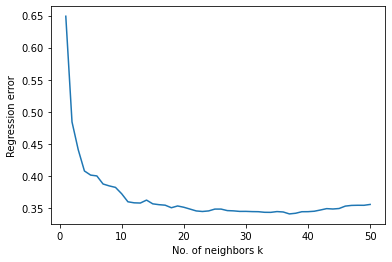

In [121]:
# plot regression error vs k
plt.plot(neighbors, error)
plt.xlabel("No. of neighbors k")
plt.ylabel("Regression error")
plt.show()

In [122]:
error.index(min(error))             # index having minimum error value

36

In [125]:
cv_scores_knn[36]                   # k=37 has maximum CV value

0.6593845153800529

In [126]:
max(cv_scores_knn)                  # maximum value of CV score

0.6593845153800529

#### Since the maximum value of CV score is at k = 37, it is the better model than models with other values of k.

## 2. Linear Regression Model :-

#### A linear regression model is fit on the same training dataset. To fit a linear regression model, LinearRegression() funtion is used which is present in sklearn library. This model is evaluated using 5-fold cross validation and the average CV score is calculated.

In [127]:
linreg = LinearRegression().fit(X_train, y_train)                     # fitting linear regression model
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv = 5)  # calculating CV score for 5-fold cross validation

In [128]:
np.mean(cv_scores_linreg)          # average CV score for linear regression model

0.6240664421063689

## 3. Decision Tree Model :-

#### A decision tree model is fit on the same training dataset. Since it is a regression problem, DecisionTreeRegressor() function is used which is present in the sklearn library. This model is also evaluated using a 5-fold cross validation technique and the average CV score is calculated. We can take different pair of values for max_depth and min_samples_leaf arguments and tune it to get the better CV score.

In [159]:
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 7)     
dectree = model.fit(X_train, y_train)                                    # fitting decision tree model
cv_scores_dectree = cross_val_score(dectree, X_train, y_train, cv = 5)   # calculating CV scores using 5-fold cross validation

In [160]:
np.mean(cv_scores_dectree)         # average CV score

0.6731951110384842

#### After trying different combination of values of max_depth and min_samples_leaf, the optimum solution was find at max_depth = 3, min_amples_leaf = 7 which has highest CV score among all combinations.

## 4. Testing the above models :-

#### All the above 3 models will now be tested on the test dataset (X_test, y_test) which was kept aside in the beginning. This will show that which is the best model to use based on the Root Mean Square Error of each model.

#### Since at k = 37, we get the best CV score, a 37NN model is fitted on training dataset and predicitions are made on test data. Root Mean square error is calculated to evaluate the model.

In [163]:
# 1. Testing the kNN model i.e. 37NN model
knn = KNeighborsRegressor(n_neighbors = 37)     
knn.fit(X_train, y_train)                    # 37NN model is fitted
y_pred_knn = knn.predict(X_test)             # values are predicted for test data

In [170]:
RMSE_knn = np.sqrt(np.mean((np.array(y_test) - y_pred_knn)**2)) # Root mean square error is calculated by actual and predicted value
RMSE_knn

4.45551752425983

In [166]:
# 2.Testing the linear regression model
y_pred_linreg = linreg.predict(X_test)    # values are predicted for test data using LR model

In [171]:
RMSE_linreg = np.sqrt(np.mean((np.array(y_test) - y_pred_linreg)**2)) # Root mean square error is calculated by actual and predicted value
RMSE_linreg

4.12627748822287

In [168]:
# 3.Testing the decision tree model
y_pred_dectree = dectree.predict(X_test) # values are predicted for test data using DT model

In [172]:
RMSE_dectree = np.sqrt(np.mean((np.array(y_test) - y_pred_dectree)**2)) # Root mean square error is calculated by actual and predicted value
RMSE_dectree

4.047208039078376

## 5. Best performing model :-

#### Root Mean Square Error(RMSE) is calculated for each model. RMSE for each model :- kNN = 4.45, linear regression = 4.13 and decision tree = 4.04. Lower the value of RMSE, better the model. Thus, the best performing model among all is Decision tree.